# Julia in Julia
## Maksym Solodovskyi & Chris Watkins

In [1]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end

@doc juliamap

juliamap(c,z; maxiter) :   Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero if the iteration never diverges.

  * c : complex constant definining the set
  * z : complex number being iterated
  * maxiter : maximum iteration number, defaults to 100


In [2]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Evaluate j0 on single complex points. Note: im is the imaginary unit in Julia
print( j0( complex(1.1, 0.3) ) )  # Recommended construction for complex numbers
print( j0( 1.1 + 0.3im ) )       # Equivalent result, but constructs z in 2 steps

# Evaluate j0 across an array - the . notation automatically vectorizes any function
a = linspace(complex(0.1,0.3), complex(1.5,0.3), 100)
print( j0.(a) )

33

[0

, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

What this is doing is first initializing the juliamap with c=0, to define a function of one variable. We evaluate for specific z, then for x = 0.1:1.5, y=0.3:0.3, with 100 steps for x and and evaluate the juliamap for these z values.

In [3]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=2000, ypoints=2000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x.+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [4]:
# The vectorized function can be applied directly to the plane
@time cplane = complex_plane()
@time j0p = j0.(cplane)

  0.361221 seconds (156.14 k allocations: 68.799 MiB, 27.80% gc time)
 

 0.945641 seconds (76.03 k allocations: 34.587 MiB, 1.99% gc time)


2000×2000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

What the complexplane function is doing is initializing xmin, xmax, ymin, ymax, xpoints, and ypoints to build the complex plane. The semicolon defines optional arguments, in this case xpoints and ypoints. If no arguments are inputted for xpoints and/or ypoints they will be defaulted to 2000. Then the j0 function is applied to the whole plane. 

In [5]:
mutable struct ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Number,2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=2000, ypoints=2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [6]:
cplane = ComplexPlane(xpoints=200,ypoints=200);
typeof(cplane)

ComplexPlane

In [7]:
print(typeof(cplane.x))
cplane.z = j0.(cplane.z)

LinSpace{Float64}

200×200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

The mutable structure is similar to classes in python, where the analagous __init__ function is defining the variable types. This is similar to defining an empty list for fs in our python julia plane.

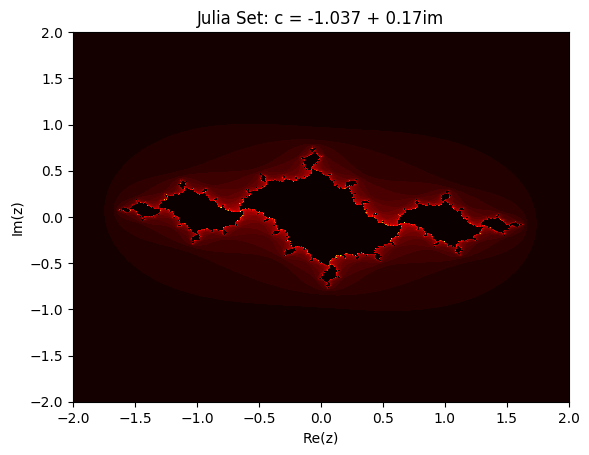

In [8]:
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                 #  Also output figure to png file

In [9]:
c = -0.624 + 0.435im                 #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("jet"))

Kernel terminated -- this might be caused by running out of memory or hitting a bug in some library (e.g., forking too many processes, trying to access invalid memory, etc.). Consider restarting or upgrading your project or running the relevant code directly in a terminal to track down the cause.